## Gerekli Kütüphanelerin Yüklenmesi

In [1]:
# Gerekli kütüphanelerin yüklenmesi
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt

## Excel Verisinin Çalıştırma Ortamına Aktarılması ve Sayfaların Birleştirilmesi

In [2]:
# Dosya okuma işlemleri 
file_path = 'Folds5x2_pp.xlsx'

# Sheet1 ve Sheet2'yi okuma işlemi
sheet1 = pd.read_excel(file_path, sheet_name='Sheet1')
sheet2 = pd.read_excel(file_path, sheet_name='Sheet2')

# Veri setini birleştirme işlemi
data = pd.concat([sheet1, sheet2], ignore_index=True)

# İlk 5 satırı gösterme head()
data.head()


,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


## Veri Setinin Özet Bilgisini Gösterme

In [3]:
# Veri setinin özet bilgisi
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19136 entries, 0 to 19135
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      19136 non-null  float64
 1   V       19136 non-null  float64
 2   AP      19136 non-null  float64
 3   RH      19136 non-null  float64
 4   PE      19136 non-null  float64
dtypes: float64(5)
memory usage: 747.6 KB
None


## Eksik Değer Kontrolünün Yapılması

In [4]:
# Eksik değer kontrolünün yapılması 
print(data.isnull().sum())

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64


## Veri Setinin Özet İstatistikleri Gösterme 

In [5]:
# Veri setinin özet istatistikleri gösterme
data.describe()


,AT,V,AP,RH,PE
count,19136.000000,19136.000000,19136.000000,19136.000000,19136.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452278,12.707561,5.938629,14.599887,17.066549
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


## Bağımsız ve Bağımlı Değişkenlerin Ayrılması İşlemi

In [6]:

# Hedef değişken (PE) ve bağımsız değişkenleri ayırma
X = data.drop("PE", axis=1)
y = data["PE"]

# ilk 5 tanesi gösterme
print("Bağımsız Değişkenler:\n", X.head())
print("Bağımlı Değişken:\n", y.head())

Bağımsız Değişkenler:
       AT      V       AP     RH
0  14.96  41.76  1024.07  73.17
1  25.18  62.96  1020.04  59.08
2   5.11  39.40  1012.16  92.14
3  20.86  57.32  1010.24  76.64
4  10.82  37.50  1009.23  96.62
Bağımlı Değişken:
 0    463.26
1    444.37
2    488.56
3    446.48
4    473.90
Name: PE, dtype: float64


## Veriyi Eğitim ve Test Setlerine Ayırma
-- Veriyi Ölçeklendirme

In [7]:
# Eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Veriyi Ölçeklendirme
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Ölçeklendirilmiş eğitim ve test setlerinin boyutları
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((15308, 4), (3828, 4), (15308,), (3828,))

## Korelasyon Katsayısının Görselleştrilmesi

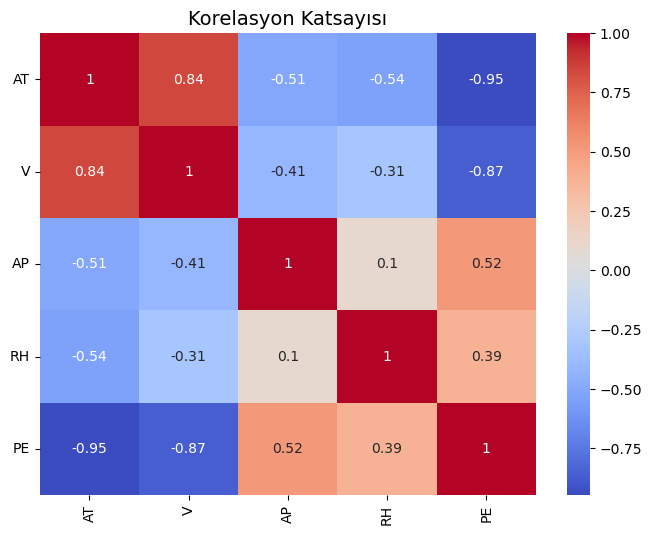

In [8]:
korelasyon_katsayisi = data.corr()

# Korelasyon matrisi görselleştirme (kutu içi değerlerle)
plt.figure(figsize=(8, 6))
sns.heatmap(korelasyon_katsayisi, annot=True, cmap="coolwarm", cbar=True)
plt.title("Korelasyon Katsayısı", fontsize=14)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

## Model Oluşturma ve Eğitme
-- knnr modelindeki n_neighbors icin en uygun degerin bulunması

In [9]:
# knnr modelindeki n_neighbors parametresini optimize etme
k_range = range(5, 10)
scores = []

for k in k_range:
    knnr_model = KNeighborsRegressor(n_neighbors=k)
    # Modeli eğitme
    knnr_model.fit(X_train, y_train)
    # Modelin performansını değerlendirme
    y_pred_knnr = knnr_model.predict(X_test)
    mse_knnr = mean_squared_error(y_test, y_pred_knnr)
    scores.append(mse_knnr)

# En iyi k değerini bulma
best_k = k_range[scores.index(min(scores))]
print(f"En iyi k değeri: {best_k}")

# En iyi k ile KNNR modelini tekrar eğitme
knnr_model = KNeighborsRegressor(n_neighbors=best_k)
knnr_model.fit(X_train, y_train)
y_pred_knnr = knnr_model.predict(X_test)
mse_knnr = mean_squared_error(y_test, y_pred_knnr)
print(f"En iyi KNNR MSE: {mse_knnr:.2f}")

# Model oluşturma (1 değeri en iyi değeri verdi)
knnr_model = KNeighborsRegressor(n_neighbors=best_k)

# Modeli eğitme
knnr_model.fit(X_train, y_train)




En iyi k değeri: 5
En iyi KNNR MSE: 10.17


KNeighborsRegressor()

## Model Performansının Değerlendirilmesi İşlemi
Eğitim ve Test Seti için ayrı ayrı performans degerlendirilmesi yapıldı.

In [10]:
# Test verisi ile tahmin yapma
y_pred_knnr = knnr_model.predict(X_test)

# Test Performans metrikleri
mse_knnr = mean_squared_error(y_test, y_pred_knnr)
r2_knnr = r2_score(y_test, y_pred_knnr)

#egitim icin Performans metrikleri
mse_egitim = mean_squared_error(y_train, knnr_model.predict(X_train))
r2_egitim = r2_score(y_train, knnr_model.predict(X_train))

print("-"*40)
print(f"Test KNNR MSE: {mse_knnr:.2f}")
print(f"Test KNNR R^2: {r2_knnr:.2f}")
print("-"*40)
print(f"Eğitim KNNR MSE: {mse_egitim:.2f}")
print(f"Eğitim KNNR R^2: {r2_egitim:.2f}")

----------------------------------------
Test KNNR MSE: 10.17
Test KNNR R^2: 0.97
----------------------------------------
Eğitim KNNR MSE: 6.34
Eğitim KNNR R^2: 0.98


## Gerçek ve Tahmin Edilen Değerleri Görselleştirilmesi

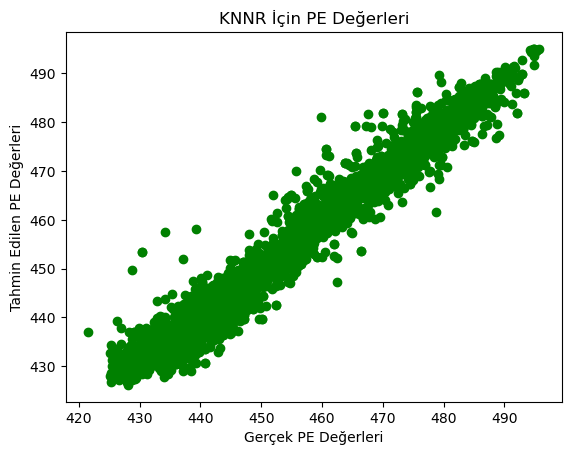

In [11]:
# Gerçek ve tahmin edilen değerleri görselleştirmek
plt.scatter(y_test, y_pred_knnr, color="green")
plt.xlabel('Gerçek PE Değerleri')
plt.ylabel('Tahmin Edilen PE Değerleri')
plt.title('KNNR İçin PE Değerleri')
plt.show()

In [12]:
# Çapraz doğrulama - KNN Regressor
for cv_value in [5, 10, 20, 40, 50]:
    knnr_cv_scores = cross_val_score(knnr_model, X_train, y_train, cv=cv_value, scoring='neg_mean_squared_error')
    mean_mse = -knnr_cv_scores.mean()
    print(f"cv={cv_value} için ortalama MSE: {mean_mse:.2f}")

knnr_cv_scores = cross_val_score(knnr_model, X_train, y_train, cv=40, scoring='neg_mean_squared_error')
print(f"KNNR Çapraz Doğrulama : {-knnr_cv_scores.mean():.2f}")

cv=5 için ortalama MSE: 11.31
cv=10 için ortalama MSE: 10.69
cv=20 için ortalama MSE: 10.55
cv=40 için ortalama MSE: 10.51
cv=50 için ortalama MSE: 10.51
KNNR Çapraz Doğrulama : 10.51


In [13]:
# RMSE (Root Mean Squared Error)
rmse_knnr = np.sqrt(mse_knnr)
print(f"KNNR RMSE: {rmse_knnr:.2f}")


KNNR RMSE: 3.19


In [14]:
# MAE (Mean Absolute Error)
mae_knnr = mean_absolute_error(y_test, y_pred_knnr)

print(f"KNNR MAE: {mae_knnr:.2f}")

KNNR MAE: 2.21


## Eğitim ve Test Performans Grafiklerinin Çizimi

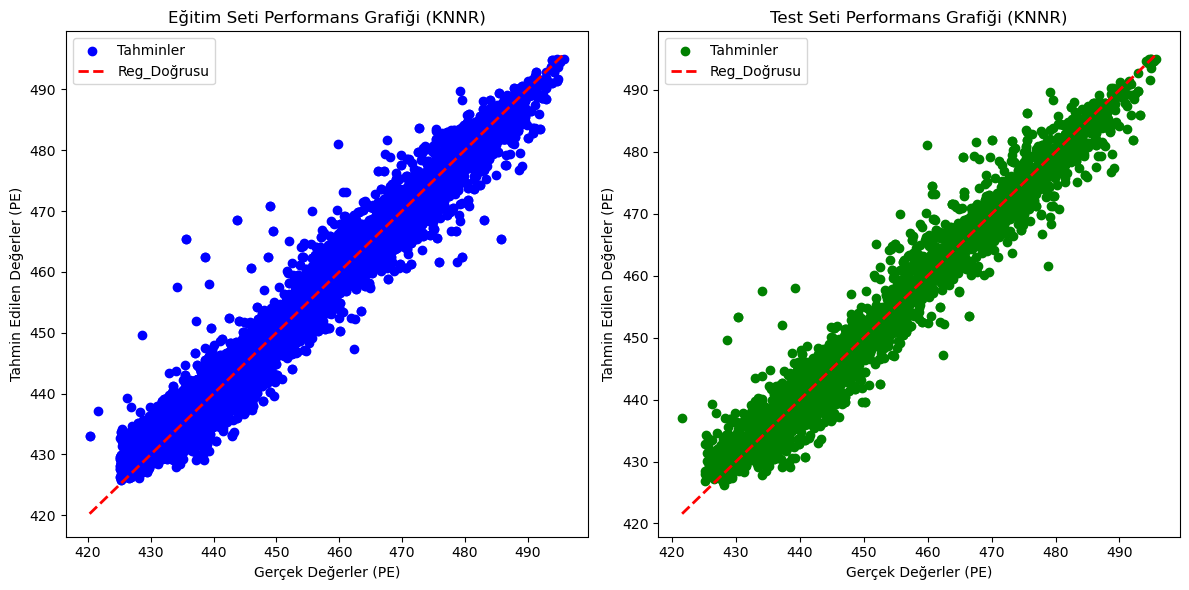

In [15]:
# Eğitim ve Test Performans Grafiklerinin Çizimi
plt.figure(figsize=(12, 6))

# Eğitim Seti Performans Grafiği
plt.subplot(1, 2, 1)
plt.scatter(y_train, knnr_model.predict(X_train), color='blue', label='Tahminler')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2, label='Reg_Doğrusu')
plt.xlabel('Gerçek Değerler (PE)')
plt.ylabel('Tahmin Edilen Değerler (PE)')
plt.title('Eğitim Seti Performans Grafiği (KNNR)')
plt.legend()

# Test Seti Performans Grafiği
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_knnr, color='green', label='Tahminler')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Reg_Doğrusu')
plt.xlabel('Gerçek Değerler (PE)')
plt.ylabel('Tahmin Edilen Değerler (PE)')
plt.title('Test Seti Performans Grafiği (KNNR)')
plt.legend()

plt.tight_layout()
plt.show()
